In [ ]:
# 1. Importaciónde Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# Including Dataset from Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/BIT/spotifydataset.csv')
df.head()


Mounted at /content/drive


,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


In [ ]:
# Obtein basic information
display(df.columns)
display(df.describe())
display(df.info())

Index(['Unnamed: 0', 'artist_name', 'genres', 'followers', 'artist_popularity',
       'artist_url', 'track_name', 'album_name', 'release_date', 'duration_ms',
       'explicit', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

,Unnamed: 0,followers,artist_popularity,duration_ms,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,1.150655e+07,59.429000,212368.619000,59.429000,0.611430,0.660562,5.243000,-7.160373,0.613000,0.091402,0.265840,0.074700,0.188810,0.516641,122.143448
std,288.819436,2.293890e+07,23.884963,65706.472572,23.884963,0.167246,0.207568,3.613725,4.479642,0.487307,0.090441,0.288895,0.225472,0.145454,0.232896,28.053658
min,0.000000,2.000000e+00,0.000000,51680.000000,0.000000,0.069000,0.003540,0.000000,-39.482000,0.000000,0.023200,0.000005,0.000000,0.026000,0.032600,49.305000
25%,249.750000,1.038784e+06,57.000000,173083.000000,57.000000,0.505500,0.539500,2.000000,-8.334250,0.000000,0.037975,0.028325,0.000000,0.095700,0.343500,99.983500
50%,499.500000,3.923159e+06,67.000000,204382.500000,67.000000,0.634000,0.680500,5.000000,-5.943500,1.000000,0.054800,0.152500,0.000004,0.129000,0.522000,122.073500
75%,749.250000,1.142132e+07,74.000000,244192.750000,74.000000,0.728250,0.820000,9.000000,-4.582500,1.000000,0.106000,0.416250,0.000586,0.246500,0.686250,138.667250
max,999.000000,1.194287e+08,92.000000,707160.000000,92.000000,0.964000,0.998000,11.000000,0.273000,1.000000,0.874000,0.996000,0.972000,0.984000,0.973000,201.776000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   artist_name        1000 non-null   object 
 2   genres             837 non-null    object 
 3   followers          1000 non-null   int64  
 4   artist_popularity  1000 non-null   int64  
 5   artist_url         1000 non-null   object 
 6   track_name         1000 non-null   object 
 7   album_name         1000 non-null   object 
 8   release_date       1000 non-null   object 
 9   duration_ms        1000 non-null   int64  
 10  explicit           1000 non-null   bool   
 11  track_popularity   1000 non-null   int64  
 12  danceability       1000 non-null   float64
 13  energy             1000 non-null   float64
 14  key                1000 non-null   int64  
 15  loudness           1000 non-null   float64
 16  mode               1000 n

None

### **Data cleaning and preparation**

In [ ]:
# Select features
audio_features = [    'duration_ms',       'explicit', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'
] #Variables to work

X = df[audio_features] #New DataSet

# 3. Escalado de Datos (Estandarización)
# Here, the scales af all variables are equalized, this step is not optional
scaler = StandardScaler()
#Transform the datas for to has MMean and standard deviation
X_scaled = scaler.fit_transform(X)
#fit: Calculate the standard deviation and mean of each column
#Transform(X) apply the formulate to all values

### THE RESULT IS AN ARRAY AND IS NOT A MATRIX



print("Datos escalados correctamente.")

Datos escalados correctamente.


In [ ]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.247746,-0.534179,1.238679,0.200823,-0.070192,-0.067277,-0.262122,0.794557,-0.538762,-0.707668,-0.331336,-0.789715,-0.952150,-0.224734
1,-0.589729,1.872032,1.071126,1.098154,-0.147313,0.486445,0.291770,-1.258562,-0.531018,-0.376933,-0.331471,-0.795218,-0.299172,-0.861119
2,-1.826740,1.872032,0.987349,-0.630704,-1.439104,1.317029,-0.518074,0.794557,-0.550930,1.399684,-0.331471,-0.088114,-0.565518,-1.334449
3,-0.325178,-0.534179,0.861684,0.230734,0.792609,-1.451583,0.561793,0.794557,-0.651599,-0.846195,-0.331363,-0.654898,0.328030,-0.144526
4,0.039976,1.872032,0.819796,1.050296,0.551603,-1.174722,0.122029,0.794557,-0.404905,-0.262648,-0.331181,-0.521456,1.161436,-0.112179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.393722,1.872032,0.400913,0.834937,0.228655,-1.451583,0.336662,0.794557,-0.408224,-0.753728,-0.331389,-0.562726,-0.032826,-0.469815
996,1.705470,1.872032,0.191471,1.080207,0.194915,0.209584,-0.008404,-1.258562,2.119558,-0.557019,-0.331471,3.935778,-1.141169,-0.650988
997,1.398695,1.872032,0.023918,0.805026,1.530086,1.040168,0.410143,0.794557,0.070782,-0.728447,-0.331289,-1.119881,0.585784,1.129314
998,0.156598,1.872032,-0.017970,0.822972,0.942032,-0.897861,0.296461,0.794557,1.588558,-0.550093,-0.331471,3.825723,-0.492488,-0.655160


#**Dimensionality Reduction (PCA)**

#### **Objetivo:** La reducción de dimensionalidad se utiliza para eliminar redundancia y ruido, mejorar la eficiencia y permitir una interpretación clara de los datos, preservando la mayor información posible.

#### *Muchas variables juntas generan problemas.
#### *Identifica patrones fuertes y elimina variaciones irrelevantes

In [ ]:
# Apply PCA to reduce to 2 components
#La reducción de dimensionalidad se utiliza para eliminar redundancia y ruido, mejorar la eficiencia
#y permitir una interpretación clara de los datos, preservando la mayor información posible.
pca = PCA(n_components=2) #Reemplazar 14 columnas originales por 2 nuevas columnas que resumen la información más importante de esas 14 colums


# **Visualizar los datos usando PCA**
#### Estamos viendo cómo se distribuyen los datos cuando toda su información original (14 variables) se resume en dos componentes principales.

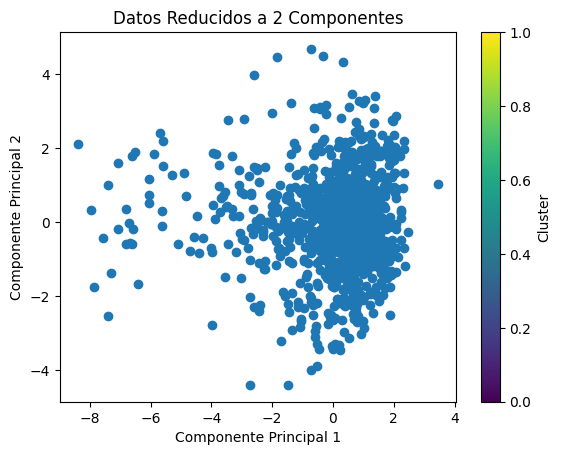

In [ ]:
scattered_data = pca.fit_transform(X_scaled)
plt.scatter(scattered_data[:, 0], scattered_data[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.title('Datos Reducidos a 2 Componentes')
plt.show()

##**Interpretación de gráfico**

#### *No hay fronteras significativamente entre diferentes estilos, los grupos musicales se mezclan entres si y no hay fronteras claras.



In [ ]:
pca.explained_variance_ratio_ #Qué porcentaje de la variabilidad total de los
#datos tiene cada componente principal (PC1 y PC2)

#PC1 → 0.2172 → 21.72% de la varianza

#PC2 → 0.1255 → 12.55% de la varianza

array([0.21723524, 0.12552635])

 # *Bloque 4: Modelado (Usa K-Means o DB Scan para generar los clusters)*

 ####

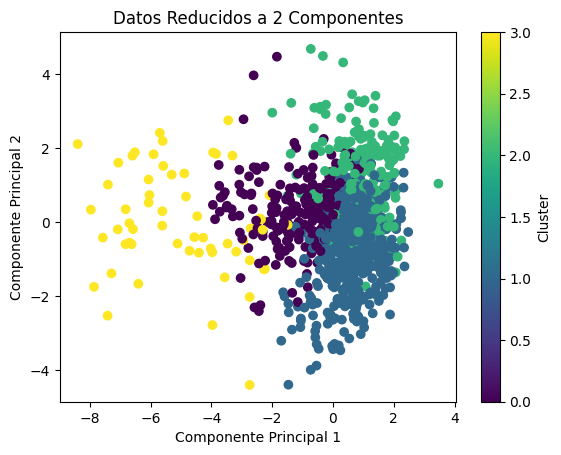

In [ ]:
kmeans = KMeans(n_clusters=4) #Dividir los datos en 4 grupos
kmeans.fit(X_scaled) #Fit. Entrena el modelo encontrando grupos
# genera 4 centroides para encontrar el perfil promedio de un gruo de canciones similares
kmeans.labels_

plt.scatter(scattered_data[:, 0], scattered_data[:, 1], c=kmeans.labels_)
#Colores
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.title('Datos Reducidos a 2 Componentes')
plt.show()

# **Interpretación de gráfico N.1**

#### Cad grupo de canciones tiene un perfil sonoro similar, aunque los colores se mezclan un poco, se observan patrones que algunas canciones son más similares entre sí. El modelo logra identificar estilos generales de canciones, como más energéticas o más tranquilas, aunque en la visualización no siempre se ve una separación perfecta.

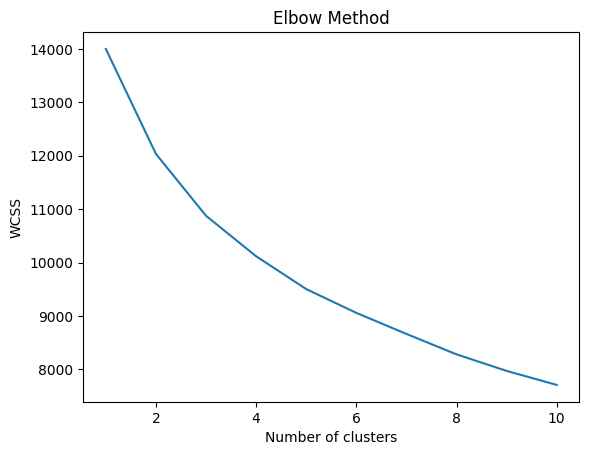

In [ ]:
## Elbow method
# ¿Cuántos grupos representan bien los datos sin complicar el modelo?

wcss = [] # Lista para guardad cada # de clusters que se pruebe
for i in range(1, 11): #Se repite hasta la posicion 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled) #Entrena el modelo
    wcss.append(kmeans.inertia_) #Guarda el WCSS correspondiente a ese número de clusters

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# **Interpretación gráfico N.3**
#### El gráfico del método del codo muestra una reducción pronunciada del WCSS hasta aproximadamente 4 clusters, a partir de los cuales la mejora se vuelve marginal, lo que sugiere que 4 clusters es una elección adecuada. El codo no es un punto exacto, es una zona.


#**Definiendo el modelo DBSCAN**
#### Agrupa puntos que están densamente juntos y detecta ruido


Text(0, 0.5, 'Componente Principal 2')

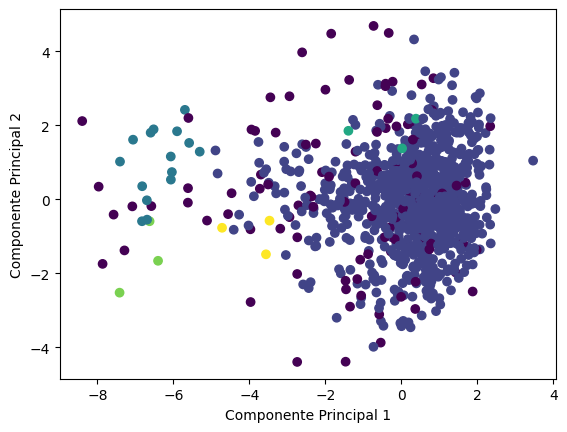

In [ ]:
#Definienod el modelo DBSCAN
db = DBSCAN(eps=2.8, min_samples=3)
db.fit(X_scaled)
db.labels_

plt.scatter(scattered_data[:, 0], scattered_data[:, 1], c=db.labels_)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

#**Interpretación gráfico N.4**

#### *La mayor parte de los puntos están concentrados y comparten el mismo color.
#### *La mayoria de las canciones tiene características sonoras similares entre si.
#### *Detecta pocas canciones atípicas.


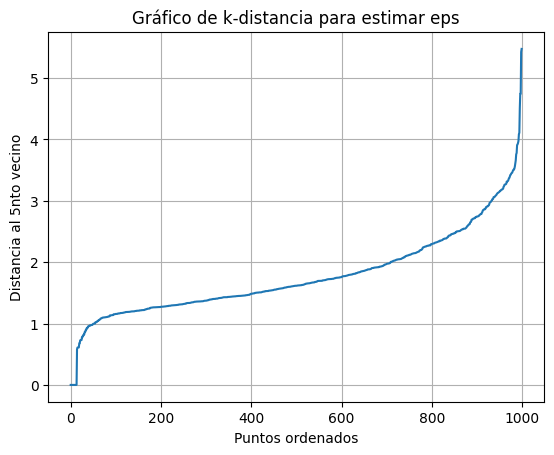

In [ ]:
from sklearn.neighbors import NearestNeighbors #Calcula los vecinos más próximos
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5) #buscar 5 vecinos más cercanos
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled) #Matriz de distancias
distances = np.sort(distances[:, 1])  # distancia al 2NDO vecino

plt.plot(distances)
plt.title('Gráfico de k-distancia para estimar eps')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5nto vecino')
plt.grid()
plt.show()

#**Interpretación del gráfico N.5**
#### Hasta una distancia de ~2.7 los puntos todavía tienen suficientes vecinos como para formar grupos densos. Después de ese valor, los puntos están demasiado lejos entre sí y deben considerarse ruido

In [ ]:
df['cluster'] = kmeans.labels_ #creacion de columna nueva del Dataset
df.head()

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842,1
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998,6
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726,2
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091,1
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998,6


# **Visualización y Análisis**

#### Visualiza los clusters y genera un Heatmap para interpretar qué significa cada grupo.

In [ ]:
df.groupby('cluster').count()['artist_url'] #Agrupa el DataFrame según el valor de la columna

,artist_url
cluster,
0,65
1,172
2,94
3,87
4,181
5,39
6,147
7,127
8,36


In [ ]:
df_cluster = df.groupby('cluster')[audio_features].mean()
df_cluster
#Cada grupo representa un cluster generado por K-Means (o DBSCAN)

,duration_ms,explicit,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,,,,
0,230930.276923,0.046154,3.969231,0.613185,0.680308,4.476923,-6.844431,0.661538,0.091511,0.208527,0.031134,0.154995,0.469140,128.243600
1,206842.215116,0.000000,69.732558,0.694500,0.687192,5.034884,-6.296320,1.000000,0.064349,0.213700,0.000664,0.142115,0.662919,115.109308
2,208926.393617,0.042553,61.893617,0.486713,0.371065,5.734043,-10.223447,0.840426,0.041643,0.721862,0.033148,0.147485,0.335745,112.631872
3,215337.057471,0.241379,64.310345,0.573414,0.846678,4.609195,-4.743264,0.758621,0.093907,0.097320,0.018509,0.496759,0.590253,130.948356
4,202852.668508,0.000000,68.961326,0.686227,0.714961,5.983425,-5.660182,0.000000,0.072127,0.213760,0.005176,0.162644,0.614164,117.621039
5,274007.692308,0.025641,20.794872,0.556513,0.691795,5.205128,-8.644282,0.615385,0.061695,0.215054,0.813128,0.197244,0.377956,127.142538
6,202080.040816,1.000000,69.945578,0.726245,0.674027,5.326531,-6.146735,0.537415,0.115739,0.187264,0.006109,0.161033,0.538971,119.012673
7,236307.874016,0.055118,65.118110,0.453016,0.772827,5.196850,-5.519567,0.803150,0.071402,0.090109,0.027808,0.168172,0.353208,140.580961
8,221564.388889,0.000000,48.333333,0.335750,0.163393,4.500000,-23.017139,0.638889,0.049047,0.953833,0.835056,0.120872,0.282114,111.575333


In [ ]:
df[df['cluster']==1]['genres'].value_counts()
#Qué elementos están adentro del cluster y toma unicamente los genres

,count
genres,
pop,9
"banda, musica mexicana, norteno",7
country,7
"neo mellow, post-teen pop, viral pop",7
"atl hip hop, contemporary r&b, dance pop, pop, r&b, rap, south carolina hip hop, urban contemporary",6
"banda, corrido, musica mexicana, norteno, sad sierreno, sierreno",6
"desi hip hop, filmi, tamil hip hop",6
"pop, singer-songwriter pop, uk pop",5
"dance pop, pop",5


## *¿Qué tipo de canciones tristes predominan en los diferentes Clusters en cuanto a popularidad?*



In [ ]:
df['sad'] =(
    (df['liveness']< 0.4) &
    (df['energy'] < 0.5)
)
sad_songs = df[df['sad']]
top_sad_songs = (sad_songs.sort_values(['cluster', 'track_popularity'], ascending=[True, False])
                 .groupby('cluster')
                 .head(1))
top_sad_songs[['track_name', 'artist_name', 'track_popularity']]


,track_name,artist_name,track_popularity
785,Will You Still Love Me Tomorrow - Bachata,A,9
71,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA,81
31,Fortnight (feat. Post Malone),Taylor Swift,89
40,I Wanna Be Yours,Arctic Monkeys,91
468,Break,alex_g_offline,74
158,one of wun,Gunna,85
168,I'm with You,Avril Lavigne,78
967,Anchor,Novo Amor,77
7,7 rings,Ariana Grande,82


### **Popularidad de las Top Canciones Tristes por Cluster**
### *Objetivo: Identificar las 10 canciones tristes más reproducidas o populares*

/tmp/ipython-input-1993003798.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'song_artist', y='track_popularity', data=plot_data, palette='viridis')


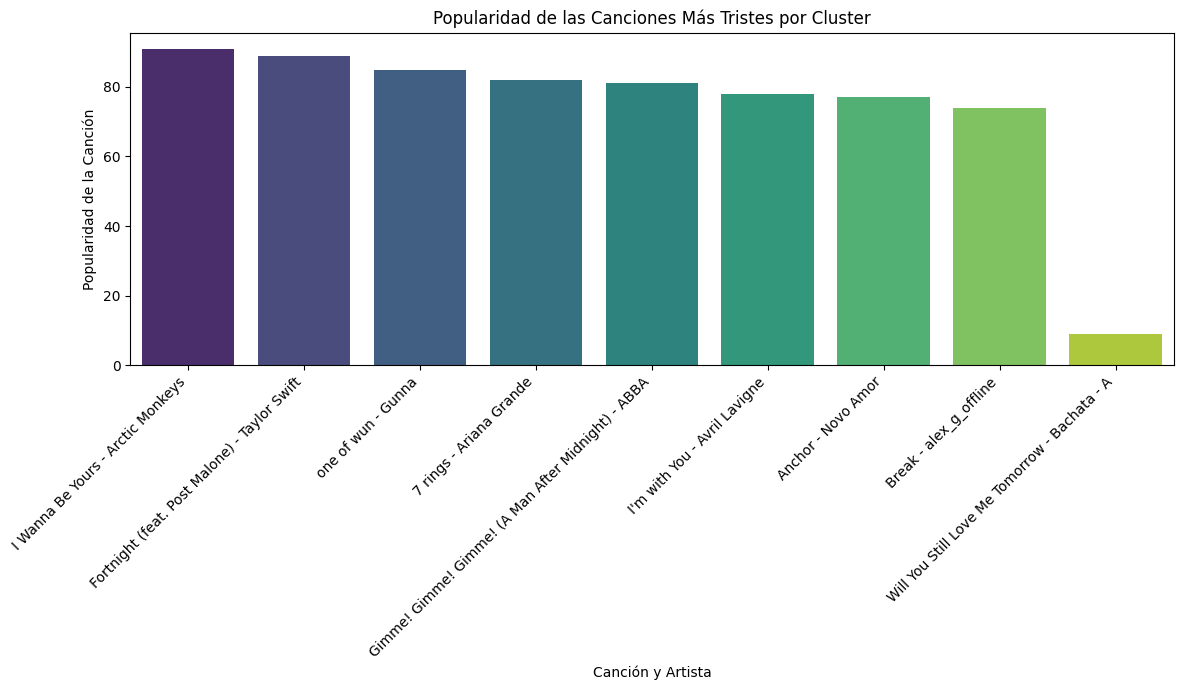

In [ ]:
#Importar librerias
import seaborn as sns
import matplotlib.pyplot as plt
#Preparar los datos para el gráfico
plot_data= top_sad_songs[['track_name','artist_name','track_popularity']].copy()
#Unir al nombre de la canción el nombre del artista
plot_data['song_artist'] = plot_data['track_name'] +' - ' +plot_data['artist_name']

#Ordenando datos de más popular a menos popular
plot_data =plot_data.sort_values(by= 'track_popularity', ascending=False)

plt.figure(figsize=(12, 7))
#Definir diseño de las barras
sns.barplot(x= 'song_artist', y='track_popularity', data=plot_data, palette='viridis')

plt.xlabel('Canción y Artista')
plt.ylabel('Popularidad de la Canción')
plt.title('Popularidad de las Canciones Más Tristes por Cluster')
plt.xticks(rotation=45, ha='right') #Rotar etiquetas
plt.tight_layout() #Ajustar el gráfico
plt.show()



#**Interpretación del gráfico N.6**
#### En el gráfico se evidencia las 9 canciones más tristes y populares de los 10 clusters ya definidos en el Elbow Method.



In [ ]:
sad_top_profile = (
    top_sad_songs
    .groupby('cluster')[['valence', 'energy', 'tempo', 'acousticness']].mean()

)
sad_top_profile

,valence,energy,tempo,acousticness
cluster,,,,
0,0.710,0.490,133.025,0.0232
1,0.536,0.491,119.528,0.0200
2,0.281,0.386,192.004,0.5020
4,0.479,0.417,67.528,0.1360
5,0.480,0.452,79.318,0.0316
6,0.287,0.453,139.943,0.0872
7,0.208,0.406,151.950,0.0800
8,0.126,0.407,117.053,0.8050
9,0.330,0.317,139.848,0.5910


## **Interpretación Tabla N.1**
### Se puede evidenciar que en el Clusters existen tipos de canciones tristes con diferentes estilos de tristeza. La mayoria de canciones se caracterizan por tener valence bajo con tonalidades melancolicas, así mismo su nivel de energía no sobrepasa 0,5, lo que indica que son canciones calmadas; de acuerdo al tempo no existe una tendencia particular, sino canciones más rápidas, medias y lentas y finalmente las canciones que usaron parcialmente instrumentos para su elaboración fueron 4. En conclusión en los clusters se identifica canciones con tristeza moderada, una canción que no representa tristeza significativa, logrando separar diferentes perfiles emocionales en el conjunto de canciones


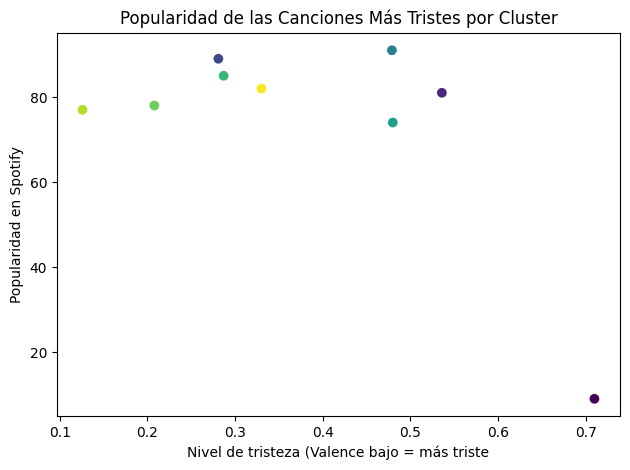

In [ ]:
plt.scatter(
    top_sad_songs['valence'],
    top_sad_songs['track_popularity'],
    c = top_sad_songs['cluster'],
    cmap = 'viridis'

)

plt.xlabel('Nivel de tristeza (Valence bajo = más triste')
plt.ylabel('Popularidad en Spotify')
plt.title('Popularidad de las Canciones Más Tristes por Cluster')
plt.tight_layout() #Ajustar el gráfico

plt.show()

###Cada punto representa una canción triste. El eje horizontal indica el nivel de tristeza (valence bajo implica mayor tristeza) y el eje vertical la popularidad. Los colores indican el cluster al que pertenece cada canción.

In [ ]:
top_sad_songs[['track_name', 'artist_name', 'cluster', 'valence', 'track_popularity']]
display(top_sad_songs)

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,sad
785,785,A,NaN,25,9,https://open.spotify.com/artist/1jEW6dI75QSGs0...,Will You Still Love Me Tomorrow - Bachata,V olume 2,2021-10-05,196310,...,-9.708,1,0.0316,0.0232,0.014600,0.3540,0.710,133.025,0,True
71,71,ABBA,"europop, swedish pop",12698682,81,https://open.spotify.com/artist/0LcJLqbBmaGUft...,Gimme! Gimme! Gimme! (A Man After Midnight),Voulez-Vous,1979,292613,...,-9.655,1,0.0403,0.0200,0.008990,0.1590,0.536,119.528,1,True
31,31,Taylor Swift,pop,119286617,89,https://open.spotify.com/artist/06HL4z0CvFAxyc...,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,2024-04-18,228965,...,-10.976,1,0.0308,0.5020,0.000015,0.0961,0.281,192.004,2,True
40,40,Arctic Monkeys,"garage rock, modern rock, permanent wave, rock...",26055385,91,https://open.spotify.com/artist/7Ln80lUS6He07X...,I Wanna Be Yours,AM,2013-09-09,183956,...,-9.345,0,0.0256,0.1360,0.022000,0.0974,0.479,67.528,4,True
468,468,alex_g_offline,NaN,690529,74,https://open.spotify.com/artist/0bC6e2YtIRLbKx...,Break,1234,2023-07-09,177028,...,-14.238,1,0.0267,0.0316,0.859000,0.1190,0.480,79.318,5,True
158,158,Gunna,"atl hip hop, melodic rap, rap, trap",7819110,85,https://open.spotify.com/artist/2hlmm7s2ICUX0L...,one of wun,One of Wun,2024-05-10,144000,...,-4.589,0,0.2700,0.0872,0.000163,0.1040,0.287,139.943,6,True
168,168,Avril Lavigne,"canadian pop, candy pop, dance pop, pop",11207940,78,https://open.spotify.com/artist/0p4nmQO2msCgU4...,I'm with You,Let Go,2002-06-04,223066,...,-7.462,1,0.0291,0.0800,0.000000,0.1170,0.208,151.950,7,True
967,967,Novo Amor,"ambient folk, indie folk",1179457,77,https://open.spotify.com/artist/0rZp7G3gIH6Wky...,Anchor,Bathing Beach,2017-05-26,257533,...,-11.475,1,0.0308,0.8050,0.884000,0.1260,0.126,117.053,8,True
7,7,Ariana Grande,pop,98934105,82,https://open.spotify.com/artist/66CXWjxzNUsdJx...,7 rings,"thank u, next",2019-02-08,178626,...,-10.732,0,0.3080,0.5910,0.000000,0.0881,0.330,139.848,9,True


In [ ]:
top_sad_songs['artist_name'].value_counts().head(15)

,count
artist_name,
A,1
ABBA,1
Taylor Swift,1
Arctic Monkeys,1
alex_g_offline,1
Gunna,1
Avril Lavigne,1
Novo Amor,1
Ariana Grande,1
